In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [411]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [412]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [413]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [414]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


## Changing the index to IDs, to make searching easier

In [415]:
customers.set_index('CustomerID',drop=True,inplace=True)
products.set_index("ProductID",drop=True,inplace=True)
transactions.set_index("TransactionID",drop=True,inplace=True)

## Top 10 Customers

In [394]:
top_10_customers_by_revenue = transactions.groupby("CustomerID").sum()
top_10_customers_by_revenue = top_10_customers_by_revenue.sort_values(by='TotalValue',ascending=False).head(10)
top_10_customers_by_revenue

,ProductID,TransactionDate,Quantity,TotalValue,Price
CustomerID,,,,,
C0141,P062P092P036P025P042P048P065P093P064P083,2024-02-13 23:56:362024-07-01 14:11:512024-12-...,27,10673.87,3857.06
C0054,P074P073P064P043P091P098P045P037,2024-05-06 13:06:062024-06-02 10:00:572024-01-...,24,8040.39,2643.91
C0065,P049P053P038P061P022P032P029P082P075P079,2024-02-27 22:16:222024-09-18 05:00:382024-12-...,27,7663.70,2758.00
C0156,P062P054P007P058P050P100P059P059P015P083P019,2024-09-25 19:36:272024-04-21 22:39:452024-12-...,28,7634.45,3179.64
C0082,P038P068P032P081P029P019P075,2024-09-22 07:51:552024-11-30 07:11:482024-10-...,23,7572.91,2466.17
C0188,P067P057P057P062P076P022P075P046,2024-12-26 14:40:032024-05-13 07:24:492024-11-...,21,7111.32,2584.90
C0059,P084P068P096P019P028P094P091P037,2024-09-14 15:29:162024-10-24 00:10:412024-09-...,21,7073.28,2843.71
C0028,P057P057P062P085P031P080P080P028,2024-01-25 14:28:342024-12-25 09:53:392024-01-...,24,6819.57,2308.89
C0099,P085P036P048P052P035P056P005P045,2024-12-23 18:22:032024-12-17 22:52:472024-02-...,21,6715.72,2517.87


In [395]:
top_10_customers_by_revenue = customers.loc[top_10_customers_by_revenue.index]

In [396]:
top_10_customers_by_revenue['No of Purchases so far'] = transactions['CustomerID'].value_counts()
top_10_customers_by_revenue['TotalValue'] =   transactions.groupby("CustomerID").sum().sort_values(by='TotalValue',ascending=False).head(10)['TotalValue']

In [397]:
top_10_customers_by_revenue

,CustomerName,Region,SignupDate,No of Purchases so far,TotalValue
CustomerID,,,,,
C0141,Paul Parsons,Europe,2023-02-23,10,10673.87
C0054,Bruce Rhodes,Asia,2024-09-29,8,8040.39
C0065,Gerald Hines,North America,2024-07-10,10,7663.70
C0156,William Adams,North America,2023-08-19,11,7634.45
C0082,Aimee Taylor,South America,2022-05-13,7,7572.91
C0188,Anna Ball,South America,2022-05-17,8,7111.32
C0059,Mrs. Kimberly Wright,North America,2024-04-07,8,7073.28
C0028,Jennifer Pena,Asia,2024-06-29,8,6819.57
C0099,Rodney Eaton,South America,2023-01-29,8,6715.72


([<matplotlib.patches.Wedge at 0x1aedae01410>,
 [Text(0.33991867422268784, 1.0461621742897658, 'South America'),
  Text(-1.0461621424642782, -0.3399187721714579, 'North America'),
  Text(0.3399188211458418, -1.0461621265515308, 'Asia'),
  Text(1.0461622140716127, -0.3399185517867209, 'Europe')],
 [Text(0.1854101859396479, 0.5706339132489631, '40%'),
  Text(-0.5706338958896062, -0.18541023936624976, '30%'),
  Text(0.18541026607955005, -0.5706338872099259, '20%'),
  Text(0.5706339349481523, -0.18541011915639322, '10%')])

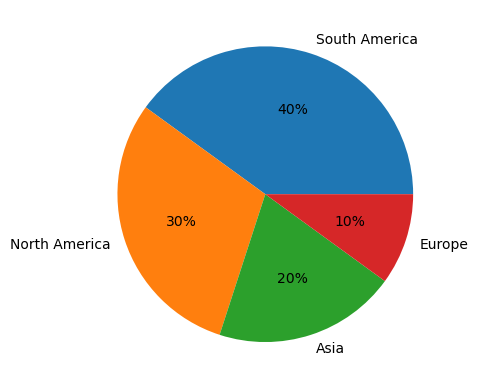

In [398]:
region_top_customer_value_counts = top_10_customers_all_region['Region'].value_counts()
plt.pie(region_top_customer_value_counts,labels=region_top_customer_value_counts.index, autopct='%.0f%%')

## Revenue Contribution by Region

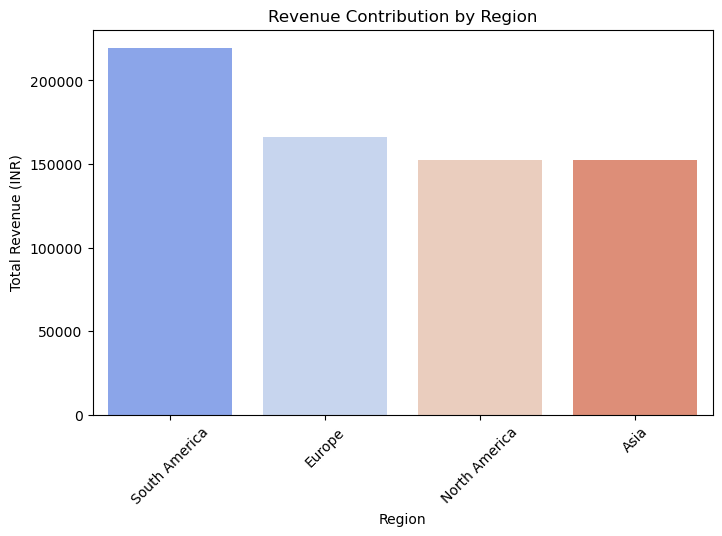

In [420]:
merged_df = transactions.merge(customers, left_on="CustomerID",right_index=True)

region_revenue = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Total Revenue (INR)")
plt.title("Revenue Contribution by Region")
plt.xticks(rotation=45)
plt.show()


## Retention and Churn Rate

In [399]:
customer_orders = transactions["CustomerID"].value_counts()


repeat_customers = customer_orders[customer_orders > 1].count()
one_time_customers = customer_orders[customer_orders == 1].count()

# Calculate retention & churn rate
total_customers = len(customer_orders)
retention_rate = (repeat_customers / total_customers) * 100
churn_rate = (one_time_customers / total_customers) * 100

print(f"Retention Rate: {round(retention_rate,2)}%")
print(f"Churn Rate: {round(churn_rate,2)}%")


Retention Rate: 93.97%
Churn Rate: 6.03%


## Top 10 selling products

In [189]:
top_10_selling_products = transactions['ProductID'].value_counts().head(10).index

In [197]:
top_10_selling_products = products.loc[transactions['ProductID'].value_counts().head(10).index]

In [207]:
top_10_selling_products['Total Items Sold'] = transactions['ProductID'].value_counts().head(10)
top_10_selling_products['Total Price'] = top_10_selling_products['Total Items Sold'] * top_10_selling_products['Price']

In [208]:
top_10_selling_products

,ProductName,Category,Price,Total Items Sold,Total Price
ProductID,,,,,
P059,SoundWave Jeans,Clothing,303.20,19,5760.80
P029,TechPro Headphones,Electronics,433.64,17,7371.88
P062,HomeSense Novel,Books,374.16,16,5986.56
P079,ActiveWear Rug,Home Decor,417.37,16,6677.92
P054,SoundWave Cookbook,Books,57.30,16,916.80
P061,HomeSense Desk Lamp,Home Decor,156.96,16,2511.36
P048,TechPro Cookbook,Books,416.40,15,6246.00
P022,HomeSense Wall Art,Home Decor,137.54,15,2063.10
P096,SoundWave Headphones,Electronics,307.47,15,4612.05


## Top selling Products by category

In [282]:
top_product_per_category = products.loc[transactions['ProductID'].value_counts().index]
top_product_per_category['Total Items Sold'] = transactions['ProductID'].value_counts()
top_product_per_category['Total Price'] = top_product_per_category['Price']*top_product_per_category['Total Items Sold']
top_product_per_category = top_product_per_category.groupby("Category").first()
top_product_per_category

,ProductName,Price,Total Items Sold,Total Price
Category,,,,
Books,HomeSense Novel,374.16,16,5986.56
Clothing,SoundWave Jeans,303.20,19,5760.80
Electronics,TechPro Headphones,433.64,17,7371.88
Home Decor,ActiveWear Rug,417.37,16,6677.92


## Customer Distribution across regions

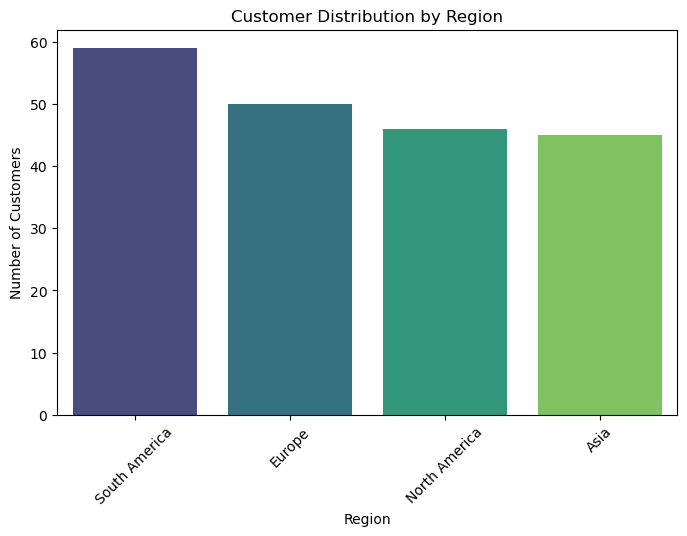

In [337]:
region_counts = customers["Region"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

## Monthly Sales trend

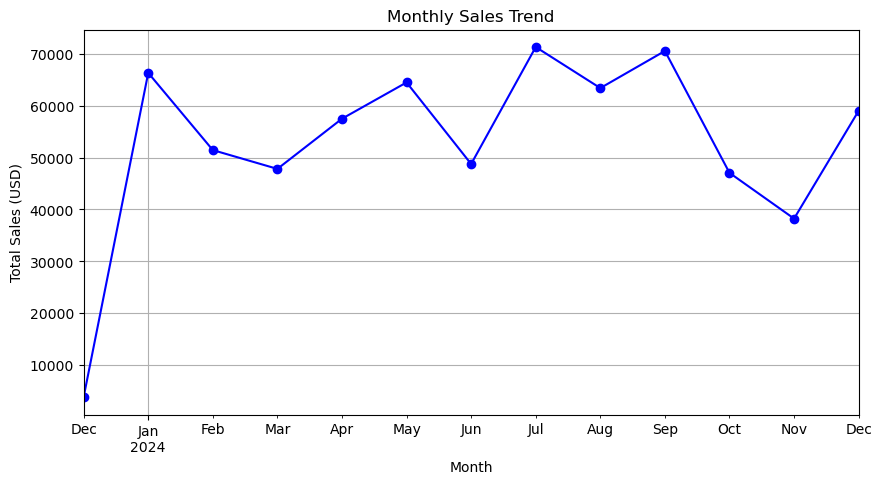

In [338]:
transactions = pd.read_csv("Transactions.csv", parse_dates=["TransactionDate"])
sales_trend = transactions.groupby(transactions["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
plt.figure(figsize=(10, 5))
sales_trend.plot(kind="line", marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.title("Monthly Sales Trend")
plt.grid()
plt.show()

## Category-wise Sales Trend

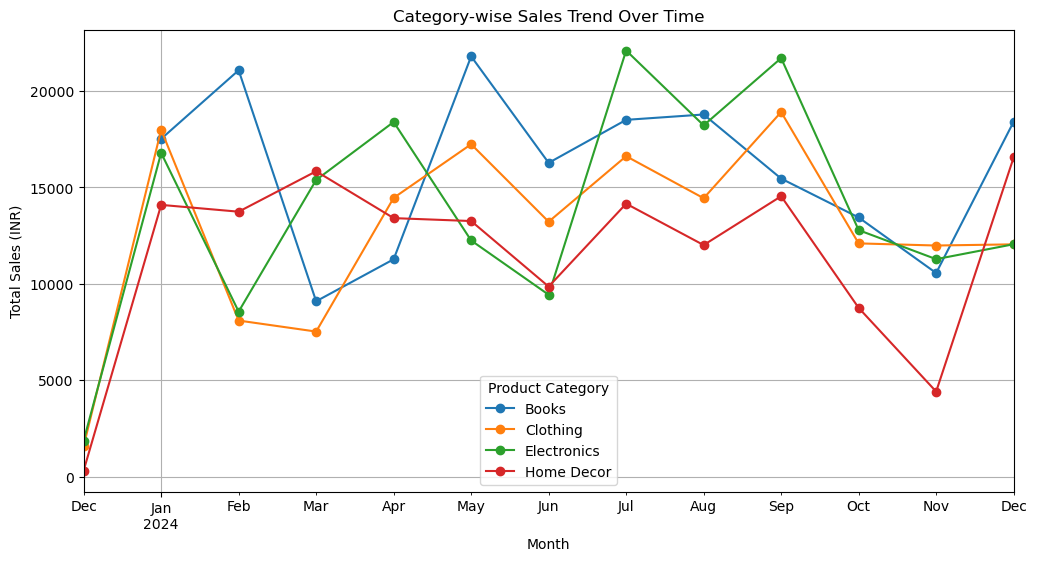

In [427]:
merged = transactions.merge(products, left_on="ProductID", right_index=True)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
category_trend = merged.groupby([merged["TransactionDate"].dt.to_period("M"), "Category"])["TotalValue"].sum().unstack()


category_trend.plot(figsize=(12, 6), marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.title("Category-wise Sales Trend Over Time")
plt.legend(title="Product Category")
plt.grid()
plt.show()


## Quarter On Quarter Growth

<Figure size 1200x600 with 0 Axes>

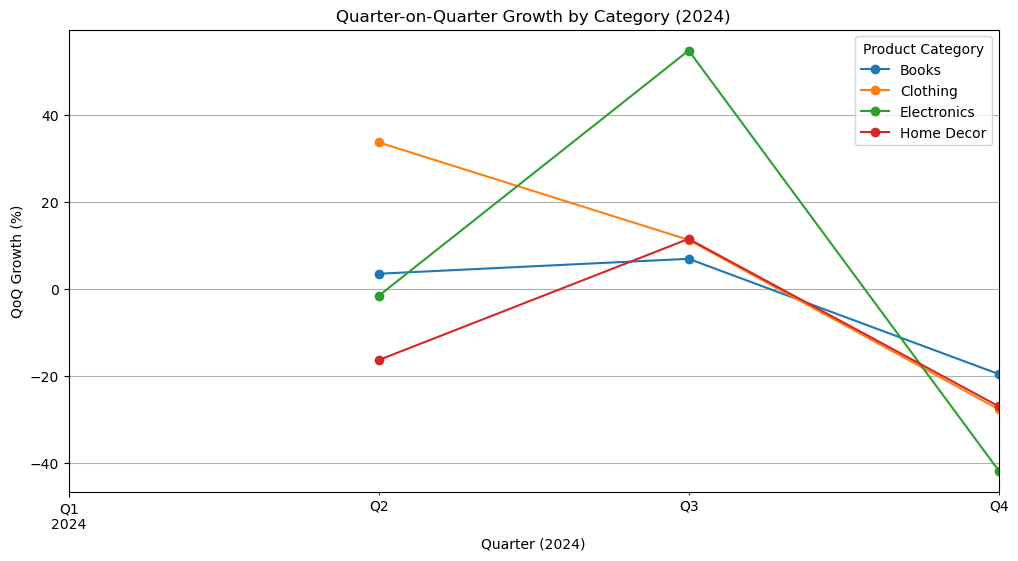

Category             Books   Clothing  Electronics  Home Decor
TransactionDate                                               
2024Q1                 NaN        NaN          NaN         NaN
2024Q2            3.468305  33.669034    -1.621788  -16.378427
2024Q3            6.893477  11.248159    54.782176   11.470540
2024Q4          -19.596812 -27.697832   -41.775812  -27.006129


In [418]:
merged = transactions.merge(products, left_on="ProductID", right_index=True)
merged["TransactionDate"] = pd.to_datetime(merged["TransactionDate"])
merged_2024 = merged[merged["TransactionDate"].dt.year == 2024]


quarterly_sales_2024 = merged_2024.groupby([merged_2024["TransactionDate"].dt.to_period("Q"), "Category"])["TotalValue"].sum().unstack()


quarterly_growth_2024 = quarterly_sales_2024.pct_change().multiply(100)  # Convert to percentage


plt.figure(figsize=(12, 6))
quarterly_growth_2024.plot(marker="o", figsize=(12, 6))
plt.xlabel("Quarter (2024)")
plt.ylabel("QoQ Growth (%)")
plt.title("Quarter-on-Quarter Growth by Category (2024)")
plt.legend(title="Product Category")
plt.grid()
plt.show()


print(quarterly_growth_2024)


## Average Order Value

In [342]:
region_aov = merged_df.groupby("Region")["TotalValue"].sum() / merged_df.groupby("Region")["TransactionID"].count()

merged_products = transactions.merge(products, on="ProductID")
category_aov = merged_products.groupby("Category")["TotalValue"].sum() / merged_products.groupby("Category")["TransactionID"].count()

print("Average Order Value by Region:\n", region_aov)
print("\nAverage Order Value by Category:\n", category_aov)


Average Order Value by Region:
 Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
dtype: float64

Average Order Value by Category:
 Category
Books          711.657296
Clothing       728.818684
Electronics    711.746063
Home Decor     608.443266
dtype: float64


## Monthly Sales

<Figure size 1200x500 with 0 Axes>

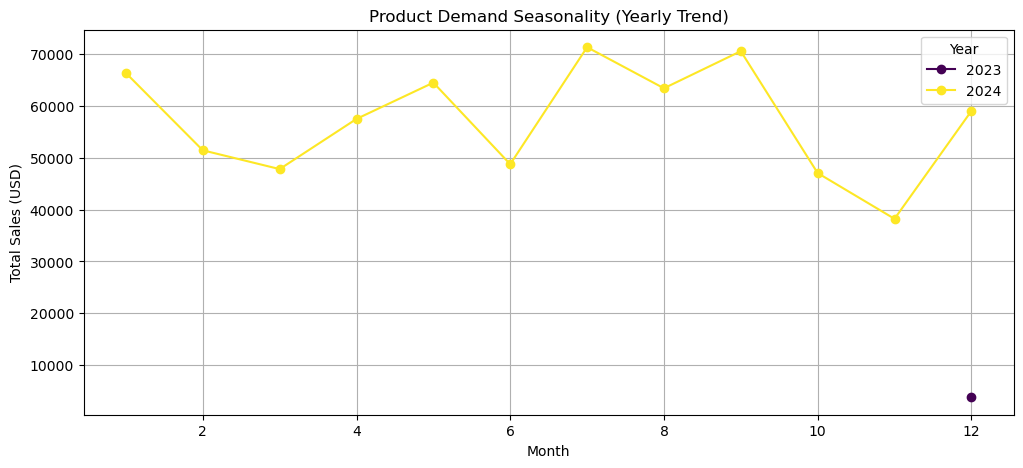

In [304]:
transactions["Month"] = transactions["TransactionDate"].dt.month
transactions["Year"] = transactions["TransactionDate"].dt.year


monthly_sales = transactions.groupby(["Year", "Month"])["TotalValue"].sum().unstack()


plt.figure(figsize=(12, 5))
monthly_sales.T.plot(kind="line", marker="o", colormap="viridis", figsize=(12, 5))
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.title("Product Demand Seasonality (Yearly Trend)")
plt.legend(title="Year")
plt.grid()
plt.show()
